**Import Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import warnings
import os
import random
random.seed(42)
np.random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
tf.random.set_seed(42)
from nlp_model_text_preprocessing import index_the_words, text_to_sequence, pad_sequences, one_hot_encoding, index_the_char, text_to_sequence_char, char_sequence_to_text, word_sequence_to_text
from arabic_text_normalization import text_normalization
from deep_learning import nlp_model_word, nlp_model_char, model_compile_word, model_compile_char, model_fit, plot_word_model_change, plot_char_model_change
from model_testing import model_testing_char, model_testing_word
from transformers_models import load_dataset, data_collator, train_arguments, training_, save_model_tokenizer, transformer_testing,transformes_model
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

**Ignore Warnings**

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

**Read Data**

In [3]:
Corpus = open("الخيميائي.txt", encoding='utf-8-sig').read().lower().split("\n")
Corpus = [line.strip() for line in Corpus if line.strip()]
Corpus =  list(map(text_normalization, Corpus))
len(Corpus)

1242

In [4]:
with open('Cleaned_Corpus.txt', 'w') as f:
    for line in Corpus:
        f.write(line + '\n') 

**1-Tokens Based On Word**

In [5]:
# Generate Word To Index, Index To Word, And Find Count Of All Words
all_words, words_index, index_to_words = index_the_words(Corpus)
all_words

8911

In [6]:
# Generate Input Sequences And Get The Max Length
input_sequence_ = []
for line in Corpus:
    token = text_to_sequence(words_index, line)
    for i in range(1, len(token)):
        n_grams = token[:i+1]
        input_sequence_.append(n_grams)
        
max_length_word =  max([len(x) for x in input_sequence_])
max_length_word

163

In [7]:
# Padding The The Input Sequence To Make All Sequence In Same Length
input_sequence_ = pad_sequences(input_sequence=input_sequence_, max_length=max_length_word)
input_sequence_

array([[   0,    0,    0, ...,    0, 3408, 1323],
       [   0,    0,    0, ..., 3408, 1323, 2888],
       [   0,    0,    0, ..., 1323, 2888, 5498],
       ...,
       [   0,    0,    0, ...,  512, 8145, 5018],
       [   0,    0,    0, ..., 8145, 5018,  664],
       [   0,    0,    0, ..., 5018,  664, 5285]])

In [8]:
# Generate Train And Label Data For Model
train, labels = input_sequence_[:,:-1], input_sequence_[:,-1]

In [9]:
# Convert Label Data 
label = one_hot_encoding(labels, all_words)
label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

*Deep Learning Models*

In [10]:
# Generate Early Stop Depending On Value Of Loss
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    mode = 'min',
    restore_best_weights=True,
)

Epoch 1/150
872/872 [==============================] - 35s 38ms/step - loss: 8.2398 - accuracy: 0.0245
Epoch 2/150
872/872 [==============================] - 32s 37ms/step - loss: 7.7049 - accuracy: 0.0278
Epoch 3/150
872/872 [==============================] - 33s 38ms/step - loss: 7.4289 - accuracy: 0.0332
Epoch 4/150
872/872 [==============================] - 34s 39ms/step - loss: 7.0689 - accuracy: 0.0437
Epoch 5/150
872/872 [==============================] - 34s 39ms/step - loss: 6.5932 - accuracy: 0.0570
Epoch 6/150
872/872 [==============================] - 34s 39ms/step - loss: 6.0516 - accuracy: 0.0769
Epoch 7/150
872/872 [==============================] - 34s 39ms/step - loss: 5.4998 - accuracy: 0.1061
Epoch 8/150
872/872 [==============================] - 35s 40ms/step - loss: 4.9615 - accuracy: 0.1586
Epoch 9/150
872/872 [==============================] - 34s 40ms/step - loss: 4.4331 - accuracy: 0.2349
Epoch 10/150
872/872 [==============================] - 34s 40ms/step - l

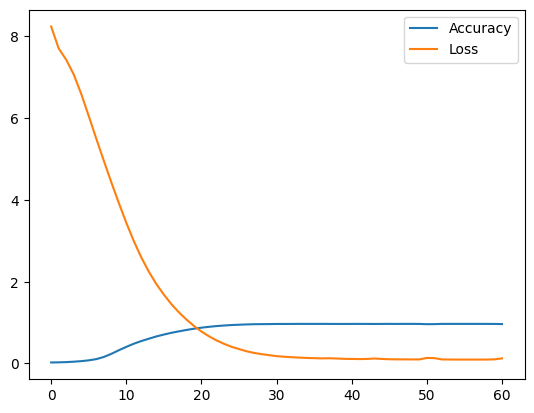

In [11]:
# 1-LSTM
lstm_model = tf.keras.layers.LSTM(units=128, return_sequences=False)
LSTM_1 = nlp_model_word(input_dim = all_words, output_dim = 100, input_length = max_length_word, unit = all_words, model = lstm_model)
model_compile_word(model =LSTM_1, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_fit(model=LSTM_1, Data=train, Label=label, epochs=150, early_stop=early_stop, batch_size=32)
plot_word_model_change(history=history)

Epoch 1/150
436/436 [==============================] - 47s 101ms/step - loss: 8.2218 - accuracy: 0.0249
Epoch 2/150
436/436 [==============================] - 43s 98ms/step - loss: 7.6713 - accuracy: 0.0299
Epoch 3/150
436/436 [==============================] - 41s 95ms/step - loss: 7.3700 - accuracy: 0.0351
Epoch 4/150
436/436 [==============================] - 44s 101ms/step - loss: 6.9809 - accuracy: 0.0436
Epoch 5/150
436/436 [==============================] - 43s 97ms/step - loss: 6.5328 - accuracy: 0.0525
Epoch 6/150
436/436 [==============================] - 48s 109ms/step - loss: 6.0730 - accuracy: 0.0700
Epoch 7/150
436/436 [==============================] - 44s 101ms/step - loss: 5.6188 - accuracy: 0.0893
Epoch 8/150
436/436 [==============================] - 46s 106ms/step - loss: 5.1858 - accuracy: 0.1238
Epoch 9/150
436/436 [==============================] - 46s 105ms/step - loss: 4.7686 - accuracy: 0.1804
Epoch 10/150
436/436 [==============================] - 45s 104ms/s

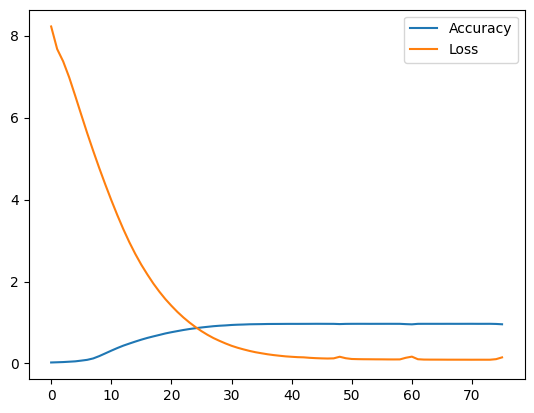

In [12]:
# 2-Bidirectional LSTM
bidirectional_lstm_model = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units= 128, return_sequences=False))
Bidirectional_LSTM_1 = nlp_model_word(input_dim = all_words, output_dim = 100, input_length = max_length_word, unit = all_words, model = bidirectional_lstm_model)
model_compile_word(model =Bidirectional_LSTM_1, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_fit(model=Bidirectional_LSTM_1, Data=train, Label=label, epochs=150, early_stop=early_stop, batch_size=64)
plot_word_model_change(history=history)

Epoch 1/150
872/872 [==============================] - 43s 46ms/step - loss: 8.2472 - accuracy: 0.0260
Epoch 2/150
872/872 [==============================] - 33s 37ms/step - loss: 7.5387 - accuracy: 0.0371
Epoch 3/150
872/872 [==============================] - 34s 39ms/step - loss: 6.9618 - accuracy: 0.0570
Epoch 4/150
872/872 [==============================] - 34s 39ms/step - loss: 6.2465 - accuracy: 0.0828
Epoch 5/150
872/872 [==============================] - 34s 39ms/step - loss: 5.4492 - accuracy: 0.1191
Epoch 6/150
872/872 [==============================] - 34s 39ms/step - loss: 4.6658 - accuracy: 0.1923
Epoch 7/150
872/872 [==============================] - 34s 39ms/step - loss: 3.9332 - accuracy: 0.3064
Epoch 8/150
872/872 [==============================] - 34s 39ms/step - loss: 3.2743 - accuracy: 0.4250
Epoch 9/150
872/872 [==============================] - 34s 39ms/step - loss: 2.6904 - accuracy: 0.5237
Epoch 10/150
872/872 [==============================] - 34s 39ms/step - l

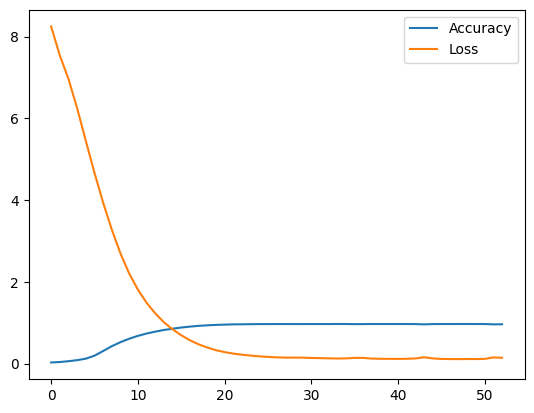

In [13]:
# 3-GRU
gru_model = tf.keras.layers.GRU(units= 128, return_sequences=False)
GRU_1 = nlp_model_word(input_dim = all_words, output_dim = 100, input_length = max_length_word, unit = all_words, model = gru_model)
model_compile_word(model =GRU_1, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model_fit(model=GRU_1, Data=train, Label=label, epochs=150, early_stop=early_stop, batch_size=32)
plot_word_model_change(history=history)

*Testing The Model*

In [14]:
# 1-LSTM
model_testing_word(text = 'رأى تاجر الزجاجيّات شروق ', number_of_words = 25, text_normalization = text_normalization, text_to_sequence = text_to_sequence, words_index = words_index, pad_sequences = pad_sequences, model = LSTM_1, max_length = max_length_word, index_to_words = index_to_words, word_sequence_to_text = word_sequence_to_text, all_words=all_words)

رأى تاجر الزجاجيّات شروق الشمس
رأى تاجر الزجاجيّات شروق الشمس فأحس
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في المكان
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في المكان نفسه
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في المكان نفسه منذ
رأى تاجر الزجاجيّات

In [15]:
# 2-Bidirectional LSTM
model_testing_word(text = 'رأى تاجر الزجاجيّات شروق ', number_of_words = 25, text_normalization = text_normalization, text_to_sequence = text_to_sequence, words_index = words_index, pad_sequences = pad_sequences, model = Bidirectional_LSTM_1, max_length = max_length_word, index_to_words = index_to_words, word_sequence_to_text = word_sequence_to_text, all_words=all_words)

رأى تاجر الزجاجيّات شروق الشمس
رأى تاجر الزجاجيّات شروق الشمس فأحس
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في المكان
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في المكان نفسه
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في المكان نفسه منذ
رأى تاجر الزجاجيّات

In [16]:
# 3-GRU
model_testing_word(text = 'رأى تاجر الزجاجيّات شروق ', number_of_words = 25, text_normalization = text_normalization, text_to_sequence = text_to_sequence, words_index = words_index, pad_sequences = pad_sequences, model = GRU_1, max_length = max_length_word, index_to_words = index_to_words, word_sequence_to_text = word_sequence_to_text, all_words=all_words)

رأى تاجر الزجاجيّات شروق الشمس
رأى تاجر الزجاجيّات شروق الشمس فأحس
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في المكان
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في المكان نفسه
رأى تاجر الزجاجيّات شروق الشمس فأحس بالغم الذي كان يكابده عند مطلع كل صباح فهو في المكان نفسه منذ
رأى تاجر الزجاجيّات

*Save The Models*

In [ ]:
LSTM_1.save('Arabic_LSTM_1.h5')

In [ ]:
Bidirectional_LSTM_1.save('Arabic_Bidirectional_LSTM_1.h5')

In [ ]:
GRU_1.save('Arabic_GRU_1.h5')

**2-Token Based On Character**

In [ ]:
# Generate Char To Index, Index To Char, And Find Count Of All Char
all_chars, chars_index, index_chars = index_the_char(Corpus)

In [ ]:
# Find The Max Length
max_length_char = max([len(s) for s in Corpus])
max_length_char

In [ ]:
# Generate Train And Label Data
Text = " ".join(Corpus)
Train = []
Label = []
for i in range(0, len(Text) - max_length_char):
    Train.append(Text[i: i + max_length_char])
    Label.append(Text[i + max_length_char])

In [ ]:
# Convert Words Into Number
sequence_text_char_Train = text_to_sequence_char(chars_index, Train)
sequence_text_char_Label = text_to_sequence_char(chars_index, Label)

In [ ]:
# Padding The The Input Sequence To Make All Sequence In Same Length
Train = pad_sequences(input_sequence=sequence_text_char_Train, max_length=max_length_char, padding='post')
# # Convert The Label Data
Label = one_hot_encoding(sequence_text_char_Label, all_chars)

**Deep Learning Model**

In [ ]:
# 1-LSTM
lstm_model = tf.keras.layers.LSTM(units= 128, return_sequences=False)
LSTM_2 = nlp_model_char(input_dim = all_chars, output_dim = 100, unit = all_chars, model = lstm_model)
model_compile_char(model =LSTM_2, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())
history = model_fit(model=LSTM_2, Data=Train, Label=Label, epochs=150, early_stop=early_stop, batch_size=32)
plot_char_model_change(history=history)

In [ ]:
# 2-Bidirectional_LSTM
bidirectional_lstm_model = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units= 128, return_sequences=False))
Bidirectional_LSTM_2 = nlp_model_char(input_dim = all_chars, output_dim = 100, unit = all_chars, model = bidirectional_lstm_model)
model_compile_char(model =Bidirectional_LSTM_2, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())
history = model_fit(model=Bidirectional_LSTM_2, Data=Train, Label=Label, epochs=150, early_stop=early_stop, batch_size=32)
plot_char_model_change(history=history)

In [ ]:
# 3-GRU
gru_model = tf.keras.layers.GRU(units= 128, return_sequences=False)
GRU_2 = nlp_model_char(input_dim = all_chars, output_dim = 100, unit = all_chars, model = gru_model)
model_compile_char(model =GRU_2, optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())
history = model_fit(model=GRU_2, Data=Train, Label=Label, epochs=150, early_stop=early_stop, batch_size=32)
plot_char_model_change(history=history)

**Model Testing**

In [ ]:
# 1-LSTM
model_testing_char(text = 'رأى تاجر', number_of_chars = 100, char_index = chars_index, pad_sequences = pad_sequences, model = LSTM_2, max_length = max_length_char, index_char = index_chars, text_to_sequence_char = text_to_sequence_char, all_chars=all_chars, char_sequence_to_text=char_sequence_to_text)

In [ ]:
# 2-Bidirectional LSTM
model_testing_char(text = 'رأى تاجر', number_of_chars = 100, char_index = chars_index, pad_sequences = pad_sequences, model = Bidirectional_LSTM_2, max_length = max_length_char, index_char = index_chars, text_to_sequence_char = text_to_sequence_char, all_chars=all_chars, char_sequence_to_text=char_sequence_to_text)

In [ ]:
# 3-GRU
model_testing_char(text = 'رأى تاجر', number_of_chars = 100, char_index = chars_index, pad_sequences = pad_sequences, model = GRU_2, max_length = max_length_char, index_char = index_chars, text_to_sequence_char = text_to_sequence_char, all_chars=all_chars, char_sequence_to_text=char_sequence_to_text)

**Save The Model**

In [ ]:
LSTM_2.save('English_LSTM_2.h5')

In [ ]:
Bidirectional_LSTM_2.save('English_Bidirectional_LSTM_2.h5')

In [ ]:
GRU_2.save('English_GRU_2.h5')

**3-Transformers**

In [ ]:
# Transformers Model Name
import torch
device = torch.device("cpu")
model_name_ = 'gpt2'
# Model And Tokenizer For Transformers
tokenizer, model = transformes_model(model_name_)
model.to(device)
# Data Used For Train Transformers
train_dataset = load_dataset('Cleaned_Corpus.txt', tokenizer)
# Convert Data Into Batches
collator = data_collator(tokenizer)
# Set Arguments For Train The Transformers
train_args = train_arguments(epochs = 50)
# Train The Transformers
training_(model=model.to(device), training_args=train_args, collator = collator, data = train_dataset)
# Save The Model
save_model_tokenizer(model = model, tokenizer = tokenizer)
# Testing The Transformers Model
transformer_testing(input_text='رأى تاجر الزجاجيّات شروق الشمس', tokenizer=tokenizer, model=model, text_normalization = text_normalization)
 